In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/donorschoose/Donations.csv
/kaggle/input/donorschoose/Schools.csv
/kaggle/input/donorschoose/Teachers.csv
/kaggle/input/donorschoose/Donors.csv
/kaggle/input/donorschoose/Projects.csv
/kaggle/input/donorschoose/Resources.csv


In [4]:
import pandas as pd
import os

# Définir le chemin vers le dossier
base_path = r"/kaggle/input/donorschoose/"

# Charger les données disponibles (sans la colonne manquante)
donations = pd.read_csv(
    os.path.join(base_path, "Donations.csv"),
    usecols=["Donor ID", "Project ID", "Donation Amount"]
)

donors = pd.read_csv(
    os.path.join(base_path, "Donors.csv"),
    usecols=["Donor ID", "Donor City", "Donor State", "Donor Is Teacher"]
)

projects = pd.read_csv(
    os.path.join(base_path, "Projects.csv"),
    usecols=[
        "Project ID", "School ID", "Teacher ID", "Project Posted Date",
        "Project Subject Category Tree", "Project Grade Level Category",
        "Project Resource Category", "Project Cost"
    ]
)

teachers = pd.read_csv(
    os.path.join(base_path, "Teachers.csv"),
    usecols=["Teacher ID", "Teacher Prefix"]
)

schools = pd.read_csv(
    os.path.join(base_path, "Schools.csv"),
    usecols=["School ID", "School City", "School State", "School Metro Type"]
)

# Fusion
df = donations.merge(donors, on='Donor ID', how='left')
df = df.merge(projects, on='Project ID', how='left')
df = df.merge(teachers, on='Teacher ID', how='left')
df = df.merge(schools, on='School ID', how='left')

# Aperçu du DataFrame fusionné
print(df.head())


                         Project ID                          Donor ID  \
0  000009891526c0ade7180f8423792063  6d5b22d39e68c656071a842732c63a0c   
1  000009891526c0ade7180f8423792063  377944ad61f72d800b25ec1862aec363   
2  000009891526c0ade7180f8423792063  4aaab6d244bf3599682239ed5591af8a   
3  000009891526c0ade7180f8423792063  0b0765dc9c759adc48a07688ba25e94e   
4  000009891526c0ade7180f8423792063  1f4b5b6e68445c6c4a0509b3aca93f38   

   Donation Amount      Donor City Donor State Donor Is Teacher  \
0            25.00  Salt Lake City        Utah              Yes   
1            25.00         Phoenix     Arizona               No   
2            25.00        Riverton        Utah              Yes   
3            20.00        Riverton        Utah               No   
4           178.37     West Jordan        Utah               No   

                          School ID                        Teacher ID  \
0  5aa86a53f658c198fd4e42c541411c76  6d5b22d39e68c656071a842732c63a0c   
1  5aa86a53f

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Load dataset (update path to your actual file)

# 1. Data Cleaning
def clean_data(df):
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Remove rows with missing key values
    df = df.dropna(subset=['Donor ID', 'Donation Amount', 'Project Posted Date'])
    
    # Clean donation amounts
    df['Donation Amount'] = df['Donation Amount'].replace('[\$,]', '', regex=True).astype(float)
    
    # Convert dates
    df['Project Posted Date'] = pd.to_datetime(df['Project Posted Date'], errors='coerce')
    
    # Standardize categoricals
    df['Donor Is Teacher'] = df['Donor Is Teacher'].str.strip().str.title()
    df['Teacher Prefix'] = df['Teacher Prefix'].str.strip().str.replace('.', '')
    
    # Remove unnecessary columns
    cols_to_drop = ['Project ID', 'Donor City', 'School City', 'Teacher Prefix']
    df = df.drop(columns=cols_to_drop, errors='ignore')
    
    return df

cleaned_df = clean_data(df)

In [6]:
cleaned_df.head()

,Donor ID,Donation Amount,Donor State,Donor Is Teacher,School ID,Teacher ID,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,School Metro Type,School State
0,6d5b22d39e68c656071a842732c63a0c,25.00,Utah,Yes,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah
1,377944ad61f72d800b25ec1862aec363,25.00,Arizona,No,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah
2,4aaab6d244bf3599682239ed5591af8a,25.00,Utah,Yes,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah
3,0b0765dc9c759adc48a07688ba25e94e,20.00,Utah,No,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah
4,1f4b5b6e68445c6c4a0509b3aca93f38,178.37,Utah,No,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,Music & The Arts,Grades 6-8,Other,$529.68,2016-05-13,suburban,Utah


In [7]:
# 2. Feature Engineering
def engineer_features(df):
    # Sort by donor and date
    df = df.sort_values(['Donor ID', 'Project Posted Date'])

    # Create reference date (1 day after last donation)
    reference_date = df['Project Posted Date'].max() + pd.Timedelta(days=1)

    # Donor-level features
    donor_features = df.groupby('Donor ID').agg(
        total_donations=('Donation Amount', 'count'),
        total_donated=('Donation Amount', 'sum'),
        first_donation_date=('Project Posted Date', 'min'),
        last_donation_date=('Project Posted Date', 'max'),
        unique_teachers=('Teacher ID', 'nunique'),
        unique_subjects=('Project Subject Category Tree', 'nunique'),
        unique_schools=('School ID', 'nunique')
    ).reset_index()

    # Calculate derived features
    donor_features['avg_donation'] = donor_features['total_donated'] / donor_features['total_donations']
    donor_features['donation_frequency'] = donor_features['total_donations'] / (
        (donor_features['last_donation_date'] - donor_features['first_donation_date']).dt.days / 30
    )
    donor_features['days_since_first_donation'] = (reference_date - donor_features['first_donation_date']).dt.days
    donor_features['days_since_last_donation'] = (reference_date - donor_features['last_donation_date']).dt.days
    donor_features['donor_tenure'] = (donor_features['last_donation_date'] - donor_features['first_donation_date']).dt.days

    # Merge donor features back to main dataframe
    df = df.merge(donor_features, on='Donor ID', how='left')

    # Current donation features
    df['donor_is_teacher_binary'] = df['Donor Is Teacher'].map({'Yes': 1, 'No': 0})

    # Time-based features
    df['donation_day_of_week'] = df['Project Posted Date'].dt.dayofweek
    df['donation_month'] = df['Project Posted Date'].dt.month
    df['donation_quarter'] = df['Project Posted Date'].dt.quarter

    # Project cost handling with robust conversion
    if 'Project Cost' in df.columns:
        # Convert to string and clean the column
        df['Project Cost'] = df['Project Cost'].astype(str).replace('[\$,]', '', regex=True)

        # Convert to numeric, coerce errors to NaN
        df['Project Cost'] = pd.to_numeric(df['Project Cost'], errors='coerce')

        # Optionally filter out rows with invalid project costs (you can remove this if you prefer to impute)
        df = df[df['Project Cost'].notna() & (df['Project Cost'] > 0)]

        # Compute amount_vs_project_cost
        df['amount_vs_project_cost'] = df['Donation Amount'] / df['Project Cost']

    # Create donation sequence numbers
    df['donation_sequence'] = df.groupby('Donor ID').cumcount() + 1

    # Calculate days since previous donation
    df['days_since_prev_donation'] = df.groupby('Donor ID')['Project Posted Date'].diff().dt.days
    df['days_since_prev_donation'] = df['days_since_prev_donation'].fillna(0)

    return df

# Apply the function to your cleaned dataframe
engineered_df = engineer_features(cleaned_df)


In [10]:
engineered_df.shape

(3629001, 32)

In [9]:
engineered_df.to_csv('/kaggle/working/engineered_df.csv', index=False)

<h1>Regression Part</h1>

In [11]:
# 4. Prepare Dataset for Regression Model
def prepare_regression_data(df):
    # Create target: next donation amount
    df = df.sort_values(['Donor ID', 'Project Posted Date'])
    df['next_donation_amount'] = df.groupby('Donor ID')['Donation Amount'].shift(-1)
    
    # Filter features
    regression_features = [
        'total_donations', 'total_donated', 'avg_donation', 'donation_frequency',
        'days_since_last_donation', 'unique_teachers', 'unique_subjects', 'unique_schools',
        'donor_tenure', 'donor_is_teacher_binary', 'donation_sequence',
        'Project Subject Category Tree', 'Project Grade Level Category',
        'Project Resource Category', 'School Metro Type', 'Donor State',
        'days_since_prev_donation', 'donation_day_of_week', 'donation_month',
        'Donation Amount', 'next_donation_amount'
    ]
    
    # Handle missing target values
    regression_df = df[regression_features].dropna(subset=['next_donation_amount'])
    
    return regression_df

regression_df = prepare_regression_data(engineered_df)

In [14]:
regression_df

,total_donations,total_donated,avg_donation,donation_frequency,days_since_last_donation,unique_teachers,unique_subjects,unique_schools,donor_tenure,donor_is_teacher_binary,...,Project Subject Category Tree,Project Grade Level Category,Project Resource Category,School Metro Type,Donor State,days_since_prev_donation,donation_day_of_week,donation_month,Donation Amount,next_donation_amount
2,9,508.95,56.550000,0.708661,204.0,5,6,6,381.0,1,...,"Math & Science, Applied Learning",Grades PreK-2,Technology,urban,California,0.0,5.0,9.0,13.75,9.69
3,9,508.95,56.550000,0.708661,204.0,5,6,6,381.0,1,...,Music & The Arts,Grades 3-5,Supplies,unknown,California,5.0,3.0,9.0,9.69,10.00
4,9,508.95,56.550000,0.708661,204.0,5,6,6,381.0,1,...,"History & Civics, Literacy & Language",Grades 6-8,Books,urban,California,24.0,6.0,10.0,10.00,100.00
5,9,508.95,56.550000,0.708661,204.0,5,6,6,381.0,1,...,"Applied Learning, Special Needs",Grades PreK-2,Supplies,urban,California,22.0,0.0,11.0,100.00,150.00
6,9,508.95,56.550000,0.708661,204.0,5,6,6,381.0,1,...,"History & Civics, Literacy & Language",Grades 6-8,Books,urban,California,62.0,6.0,1.0,150.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890861,4,66.32,16.580000,0.315789,929.0,4,2,3,380.0,0,...,Health & Sports,Grades 9-12,Supplies,suburban,Georgia,13.0,1.0,10.0,25.00,25.00
3890862,4,66.32,16.580000,0.315789,929.0,4,2,3,380.0,0,...,Health & Sports,Grades 9-12,Supplies,suburban,Georgia,133.0,1.0,2.0,25.00,10.00
3890871,3,184.00,61.333333,0.198675,155.0,1,2,2,453.0,1,...,Math & Science,Grades 9-12,Supplies,urban,Massachusetts,0.0,3.0,9.0,75.00,99.00
3890872,3,184.00,61.333333,0.198675,155.0,1,2,2,453.0,1,...,Math & Science,Grades 9-12,Supplies,urban,Massachusetts,0.0,3.0,9.0,99.00,10.00


In [12]:
# ========== PREPROCESSING (RUN THIS FIRST) ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Create output directory
os.makedirs('donation_prediction_artifacts', exist_ok=True)

# Load and preprocess data
df = regression_df.copy()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Enhanced feature engineering for general donation prediction
def engineer_features(df):
    # Recency features
    df['log_recency'] = np.log1p(df['days_since_last_donation'])
    
    # Frequency features
    df['frequency_per_month'] = df['donation_frequency'] * 30
    
    # Monetary features
    df['avg_donation_log'] = np.log1p(df['avg_donation'])
    
    # Interaction features
    df['recency_frequency'] = df['log_recency'] * df['donation_frequency']
    df['tenure_frequency'] = df['donor_tenure'] * df['donation_frequency']
    df['monetary_frequency'] = df['avg_donation'] * df['donation_frequency']
    
    # Temporal features
    df['is_weekend_donation'] = df['donation_day_of_week'].isin([5, 6]).astype(int)
    df['is_holiday_season'] = df['donation_month'].isin([11, 12]).astype(int)
    df['is_quarter_end'] = df['donation_month'].isin([3, 6, 9, 12]).astype(int)
    
    # Donor engagement features
    df['donation_momentum'] = df['donation_sequence'] / (df['donor_tenure'] + 1)
    
    return df

df = engineer_features(df)

# Select only general donation features
features = [
    'total_donations', 'total_donated', 'avg_donation', 
    'donation_frequency', 'days_since_last_donation',
    'donor_tenure', 'donation_sequence', 'days_since_prev_donation',
    'log_recency', 'frequency_per_month', 'avg_donation_log',
    'recency_frequency', 'tenure_frequency', 'monetary_frequency',
    'is_weekend_donation', 'is_holiday_season', 'is_quarter_end',
    'donation_momentum'
]

# Target variable
X = df[features]
y = df['Donation Amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, 'donation_prediction_artifacts/scaler.pkl')
print("Preprocessing complete! Data scaled and split.")

Preprocessing complete! Data scaled and split.



Training Lasso Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.832e+08, tolerance: 5.974e+06
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Metrics:
MAE: 39.36, RMSE: 143.03, R²: 0.48


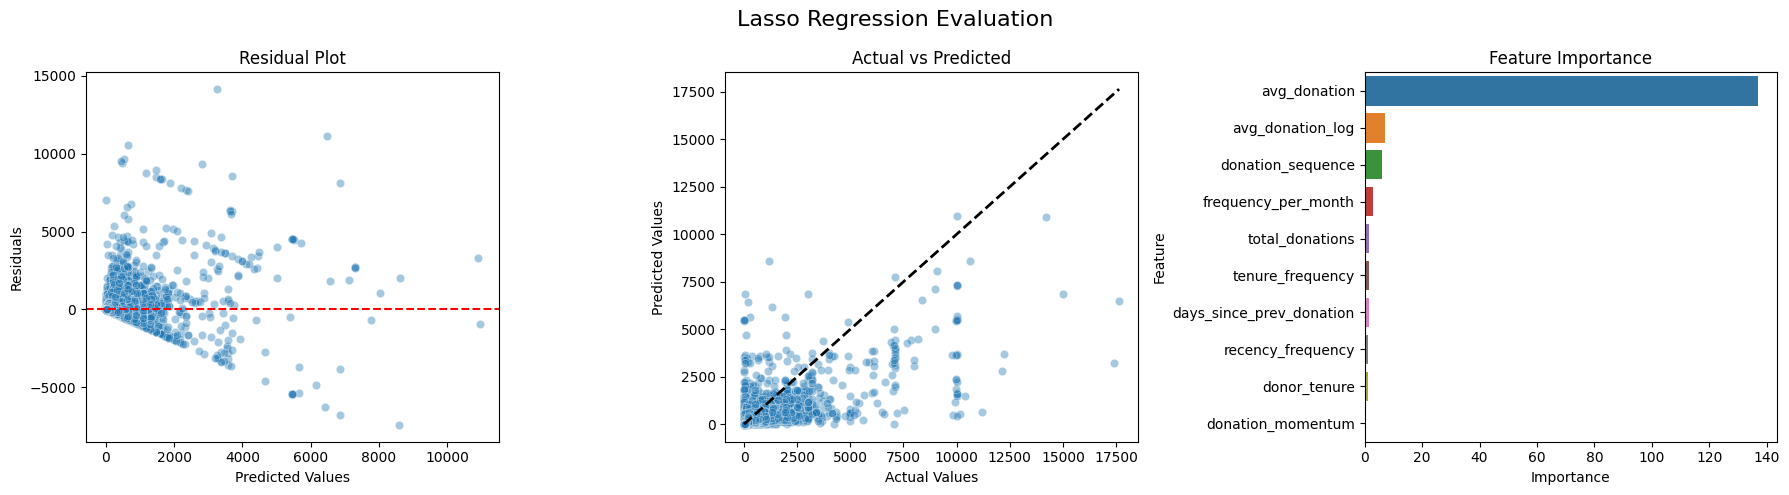

Lasso Regression training complete! Model saved.


In [13]:
# ========== LASSO REGRESSION MODEL ==========
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nTraining Lasso Regression...")
lasso = Lasso(alpha=0.001, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Save model
joblib.dump(lasso, 'donation_prediction_artifacts/lasso_model.pkl')

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lasso)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Metrics:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualizations
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Residual plot
residuals = y_test - y_pred_lasso
sns.scatterplot(x=y_pred_lasso, y=residuals, ax=ax[0], alpha=0.4)
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')

# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred_lasso, ax=ax[1], alpha=0.4)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1].set_title('Actual vs Predicted')
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Predicted Values')

# Feature Importance
coef_importance = np.abs(lasso.coef_)
importance_df = pd.DataFrame({'Feature': features, 'Importance': coef_importance})
importance_df = importance_df.sort_values('Importance', ascending=False).head(10)
sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax[2])
ax[2].set_title('Feature Importance')

plt.suptitle('Lasso Regression Evaluation', fontsize=16)
plt.tight_layout()
plt.show()

print("Lasso Regression training complete! Model saved.")

In [15]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 5.0 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing insta


Training TabNet Regressor...


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 28359.82586| test_rmse: 166.49888|  0:07:20s
epoch 1  | loss: 27741.73747| test_rmse: 152.15397|  0:14:43s
epoch 2  | loss: 26073.51913| test_rmse: 155.15894|  0:22:03s
epoch 3  | loss: 25243.43| test_rmse: 158.77144|  0:29:14s
epoch 4  | loss: 24447.57662| test_rmse: 161.59452|  0:36:25s
epoch 5  | loss: 24492.43272| test_rmse: 155.4788|  0:43:34s
epoch 6  | loss: 23853.91187| test_rmse: 158.13856|  0:50:29s
epoch 7  | loss: 24124.27059| test_rmse: 163.04529|  0:57:35s
epoch 8  | loss: 24096.61833| test_rmse: 150.23189|  1:04:57s
epoch 9  | loss: 24062.1098| test_rmse: 159.94747|  1:12:08s
Stop training because you reached max_epochs = 10 with best_epoch = 8 and best_test_rmse = 150.23189


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Successfully saved model at donation_prediction_artifacts/tabnet_model.zip.zip
TabNet Metrics:
MAE: 44.15, RMSE: 150.23, R²: 0.43


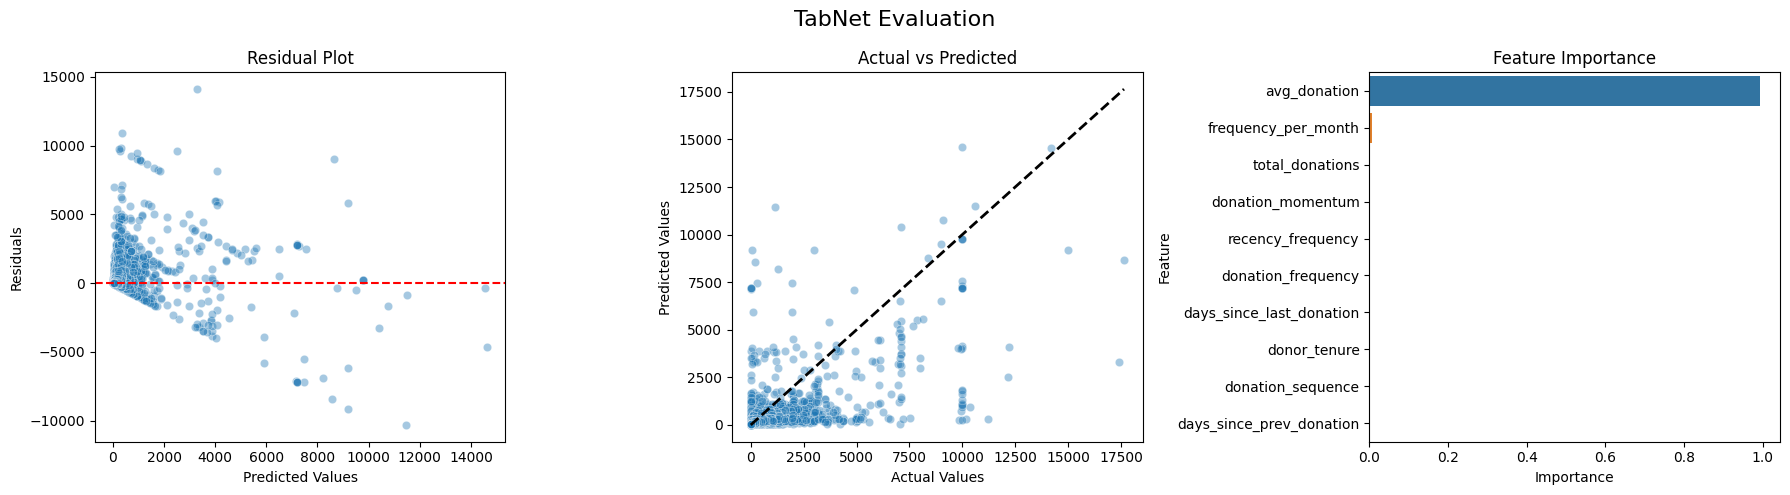

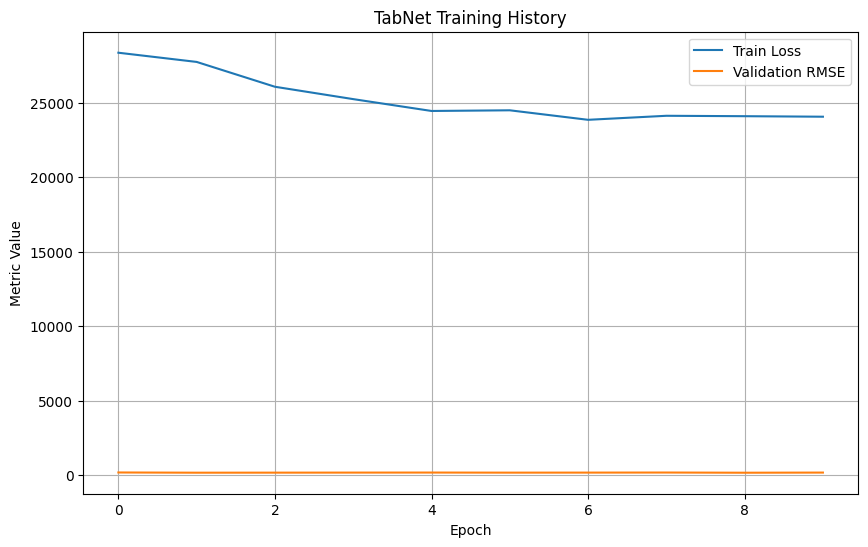

TabNet training complete! Model saved.


In [16]:
# ========== TABNET REGRESSOR MODEL ==========
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

print("\nTraining TabNet Regressor...")

# Prepare TabNet data
X_train_tab = X_train.values.astype(np.float32)
y_train_tab = y_train.values.reshape(-1, 1).astype(np.float32)
X_test_tab = X_test.values.astype(np.float32)

# Define TabNet model
tabnet = TabNetRegressor(
    n_d=32,
    n_a=32,
    n_steps=3,
    gamma=1.3,
    seed=42,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size": 30, "gamma": 0.7},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax'
)

# Train TabNet
tabnet.fit(
    X_train_tab, y_train_tab,
    eval_set=[(X_test_tab, y_test.values.reshape(-1, 1))],
    eval_name=['test'],
    eval_metric=['rmse'],
    max_epochs=10,
    patience=20,
    batch_size=128,
    virtual_batch_size=32,
    num_workers=0,
    drop_last=False
)

# Save TabNet model
tabnet.save_model('donation_prediction_artifacts/tabnet_model.zip')

# Evaluate
y_pred_tabnet = tabnet.predict(X_test_tab).flatten()
mae = mean_absolute_error(y_test, y_pred_tabnet)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tabnet))
r2 = r2_score(y_test, y_pred_tabnet)

print("TabNet Metrics:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualizations
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Residual plot
residuals = y_test - y_pred_tabnet
sns.scatterplot(x=y_pred_tabnet, y=residuals, ax=ax[0], alpha=0.4)
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')

# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred_tabnet, ax=ax[1], alpha=0.4)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1].set_title('Actual vs Predicted')
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Predicted Values')

# Feature Importance
tabnet_importances = tabnet.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': tabnet_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).head(10)
sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax[2])
ax[2].set_title('Feature Importance')

plt.suptitle('TabNet Evaluation', fontsize=16)
plt.tight_layout()
plt.show()

# Training History
plt.figure(figsize=(10, 6))
plt.plot(tabnet.history['loss'], label='Train Loss')
plt.plot(tabnet.history['test_rmse'], label='Validation RMSE')
plt.title('TabNet Training History')
plt.ylabel('Metric Value')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

print("TabNet training complete! Model saved.")


Training Deep Neural Network...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18873/18873 ━━━━━━━━━━━━━━━━━━━━ 74s 4ms/step - loss: 26811.3516 - mae: 45.5544 - rmse: 163.4510 - val_loss: 19243.1250 - val_mae: 38.8611 - val_rmse: 138.7196
Epoch 2/20
18873/18873 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - loss: 25856.5898 - mae: 43.2940 - rmse: 160.5130 - val_loss: 24033.0332 - val_mae: 40.0372 - val_rmse: 155.0259
Epoch 3/20
18873/18873 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - loss: 24521.8691 - mae: 42.4120 - rmse: 156.2535 - val_loss: 31588.7246 - val_mae: 41.6699 - val_rmse: 177.7322
Epoch 4/20
18873/18873 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - loss: 37652.3516 - mae: 42.3865 - rmse: 181.9378 - val_loss: 17430.6523 - val_mae: 38.4183 - val_rmse: 132.0252
Epoch 5/20
18873/18873 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 22644.3496 - mae: 41.7942 - rmse: 150.3005 - val_loss: 18554.8105 - val_mae: 38.7608 - val_rmse: 136.2160
Epoch 6/20
18873/18873 ━━━━━━━━━━━━━━━━━━━━ 69s 4ms/step - loss: 22526.4375 - mae: 41.6016 - rmse: 149.9834 - val_loss: 18865.8320 - val_mae: 39.

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential_1, built=True> does not.

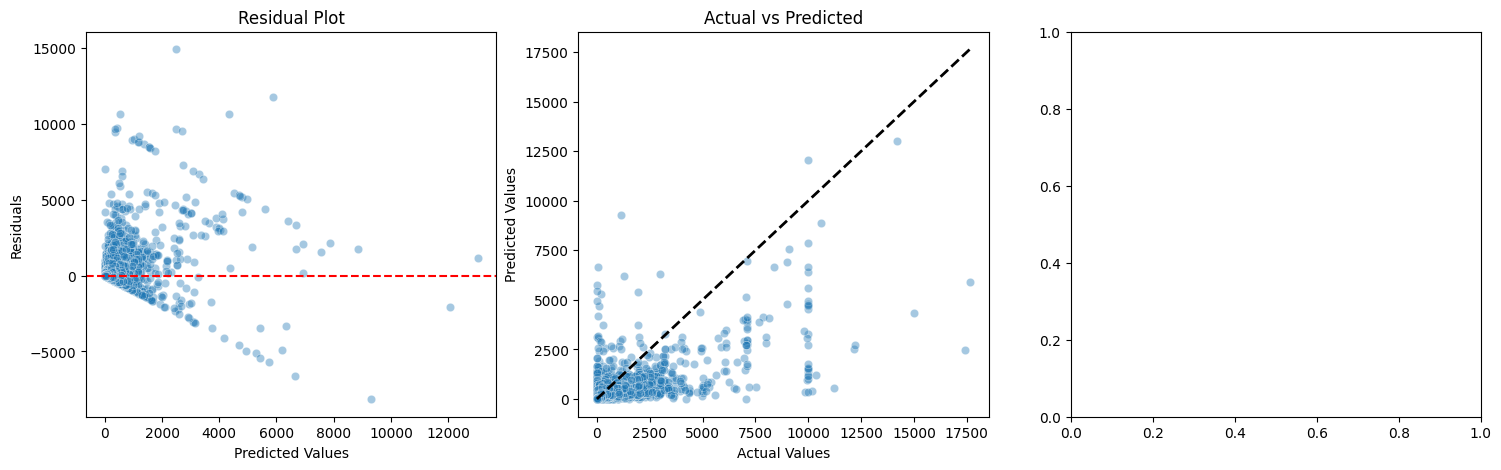

In [18]:
# ========== DEEP NEURAL NETWORK MODEL ==========
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.inspection import permutation_importance

print("\nTraining Deep Neural Network...")
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

dnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

early_stopping = EarlyStopping(
    monitor='val_rmse', 
    patience=10, 
    verbose=1, 
    mode='min', 
    restore_best_weights=True
)

history = dnn.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Save model
dnn.save('donation_prediction_artifacts/dnn_model.keras')

# Evaluate
y_pred_dnn = dnn.predict(X_test_scaled).flatten()
mae = mean_absolute_error(y_test, y_pred_dnn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dnn))
r2 = r2_score(y_test, y_pred_dnn)

print("Deep Neural Network Metrics:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualizations
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Residual plot
residuals = y_test - y_pred_dnn
sns.scatterplot(x=y_pred_dnn, y=residuals, ax=ax[0], alpha=0.4)
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].set_title('Residual Plot')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')

# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred_dnn, ax=ax[1], alpha=0.4)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1].set_title('Actual vs Predicted')
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Predicted Values')

# Permutation Importance
result = permutation_importance(
    dnn, X_test_scaled, y_test, n_repeats=5, random_state=42
)
perm_importance = result.importances_mean
importance_df = pd.DataFrame({'Feature': features, 'Importance': perm_importance})
importance_df = importance_df.sort_values('Importance', ascending=False).head(10)
sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax[2])
ax[2].set_title('Permutation Importance')

plt.suptitle('Deep Neural Network Evaluation', fontsize=16)
plt.tight_layout()
plt.show()

# Training History
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['rmse'], label='Train RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.title('Training History - RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

print("Deep Neural Network training complete! Model saved.")

/tmp/ipykernel_35/2740301232.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/2740301232.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


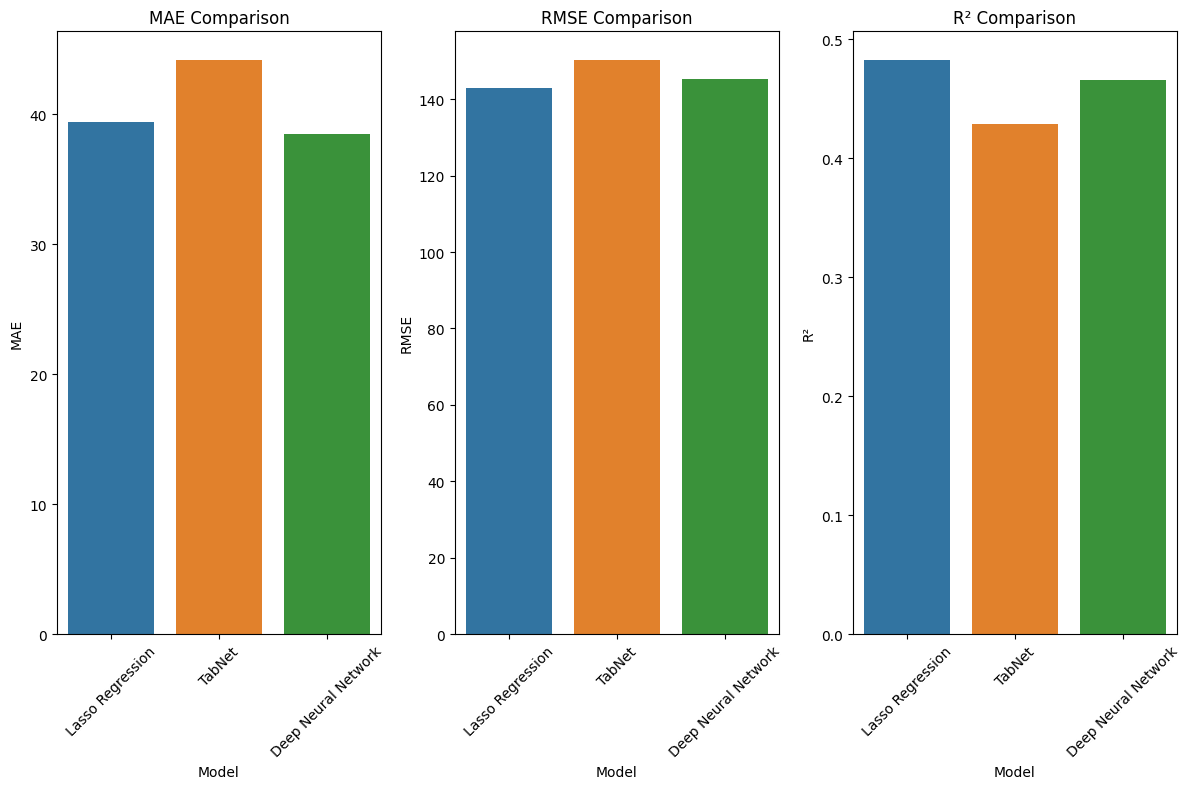


Model Comparison Results:
                 Model        MAE        RMSE        R²
0     Lasso Regression  39.358805  143.025187  0.482583
1               TabNet  44.153372  150.231885  0.429127
2  Deep Neural Network  38.436477  145.325109  0.465809

Sample Predictions:
LASSO Prediction: $150.50
Prediction error: [Errno 2] No such file or directory: 'donation_prediction_artifacts/tabnet_model.zip'
TABNET Prediction failed


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
DNN Prediction: $137.59

All models saved in 'donation_prediction_artifacts' directory:
['lasso_model.pkl', 'scaler.pkl', 'tabnet_model.zip.zip', 'model_comparison.csv', 'dnn_model.keras']


In [19]:
# ========== MODEL COMPARISON ==========
import pandas as pd

# Collect results
results = [
    {'Model': 'Lasso Regression', 
     'MAE': mean_absolute_error(y_test, y_pred_lasso),
     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
     'R²': r2_score(y_test, y_pred_lasso)},
    
    {'Model': 'TabNet', 
     'MAE': mean_absolute_error(y_test, y_pred_tabnet),
     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tabnet)),
     'R²': r2_score(y_test, y_pred_tabnet)},
    
    {'Model': 'Deep Neural Network', 
     'MAE': mean_absolute_error(y_test, y_pred_dnn),
     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dnn)),
     'R²': r2_score(y_test, y_pred_dnn)}
]

results_df = pd.DataFrame(results)
results_df.to_csv('donation_prediction_artifacts/model_comparison.csv', index=False)

# Visual comparison
plt.figure(figsize=(12, 8))
metrics = ['MAE', 'RMSE', 'R²']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

print("\nModel Comparison Results:")
print(results_df)

# ========== PREDICTION FUNCTION ==========
def predict_donation(model_type, donor_data):
    """Predict donation amount based on donor features"""
    try:
        # Create DataFrame from input
        input_df = pd.DataFrame([donor_data])
        
        # Feature engineering
        input_df['log_recency'] = np.log1p(input_df['days_since_last_donation'])
        input_df['frequency_per_month'] = input_df['donation_frequency'] * 30
        input_df['avg_donation_log'] = np.log1p(input_df['avg_donation'])
        input_df['recency_frequency'] = input_df['log_recency'] * input_df['donation_frequency']
        input_df['tenure_frequency'] = input_df['donor_tenure'] * input_df['donation_frequency']
        input_df['monetary_frequency'] = input_df['avg_donation'] * input_df['donation_frequency']
        input_df['is_weekend_donation'] = input_df['donation_day_of_week'].isin([5, 6]).astype(int)
        input_df['is_holiday_season'] = input_df['donation_month'].isin([11, 12]).astype(int)
        input_df['is_quarter_end'] = input_df['donation_month'].isin([3, 6, 9, 12]).astype(int)
        input_df['donation_momentum'] = input_df['donation_sequence'] / (input_df['donor_tenure'] + 1)
        
        # Select features
        input_df = input_df[features]
        
        # Scale features
        input_scaled = scaler.transform(input_df)
        
        # Make prediction
        if model_type == 'lasso':
            model = joblib.load('donation_prediction_artifacts/lasso_model.pkl')
            prediction = model.predict(input_scaled)[0]
        elif model_type == 'tabnet':
            model = TabNetRegressor()
            model.load_model('donation_prediction_artifacts/tabnet_model.zip')
            input_tab = input_df.values.astype(np.float32)
            prediction = model.predict(input_tab)[0][0]
        elif model_type == 'dnn':
            model = tf.keras.models.load_model('donation_prediction_artifacts/dnn_model.keras')
            prediction = model.predict(input_scaled)[0][0]
        else:
            raise ValueError("Invalid model type. Choose 'lasso', 'tabnet', or 'dnn'")
        
        return prediction
    except Exception as e:
        print(f"Prediction error: {str(e)}")
        return None

# Example usage
sample_donor = {
    'total_donations': 8,
    'total_donated': 1200,
    'avg_donation': 150,
    'donation_frequency': 0.4,
    'days_since_last_donation': 45,
    'donor_tenure': 540,
    'donation_sequence': 3,
    'days_since_prev_donation': 60,
    'donation_day_of_week': 4,
    'donation_month': 7
}

print("\nSample Predictions:")
for model_type in ['lasso', 'tabnet', 'dnn']:
    prediction = predict_donation(model_type, sample_donor)
    if prediction is not None:
        print(f"{model_type.upper()} Prediction: ${prediction:.2f}")
    else:
        print(f"{model_type.upper()} Prediction failed")

print("\nAll models saved in 'donation_prediction_artifacts' directory:")
print(os.listdir('donation_prediction_artifacts'))